# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | zhezqazghan
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | es castell
Processing Record 7 of Set 1 | antofagasta
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | wynyard
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hanceville
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | igarka
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | oriximina
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,11.07,72,86,0.89,AU,1731188649
1,margate,51.3813,1.3862,8.16,87,92,3.16,GB,1731188717
2,zhezqazghan,47.7833,67.7667,-2.34,86,100,9.90,KZ,1731188805
3,adamstown,-25.0660,-130.1015,23.13,88,99,9.13,PN,1731188786
4,port-aux-francais,-49.3500,70.2167,5.04,90,81,9.98,TF,1731188695


In [16]:
# Change the Date column to the correct format
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.07,72,86,0.89,AU,2024-11-09 21:44:09
1,margate,51.3813,1.3862,8.16,87,92,3.16,GB,2024-11-09 21:45:17
2,zhezqazghan,47.7833,67.7667,-2.34,86,100,9.90,KZ,2024-11-09 21:46:45
3,adamstown,-25.0660,-130.1015,23.13,88,99,9.13,PN,2024-11-09 21:46:26
4,port-aux-francais,-49.3500,70.2167,5.04,90,81,9.98,TF,2024-11-09 21:44:55


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.07,72,86,0.89,AU,2024-11-09 21:44:09
1,margate,51.3813,1.3862,8.16,87,92,3.16,GB,2024-11-09 21:45:17
2,zhezqazghan,47.7833,67.7667,-2.34,86,100,9.90,KZ,2024-11-09 21:46:45
3,adamstown,-25.0660,-130.1015,23.13,88,99,9.13,PN,2024-11-09 21:46:26
4,port-aux-francais,-49.3500,70.2167,5.04,90,81,9.98,TF,2024-11-09 21:44:55


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [20]:
#Extract relevant fields from data frame for plotting

latitude = city_data_df["Lat"]
longitude = city_data_df["Lng"]
temperature = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
windspeed = city_data_df["Wind Speed"]
country = city_data_df["Country"]
date = city_data_df["Date"]


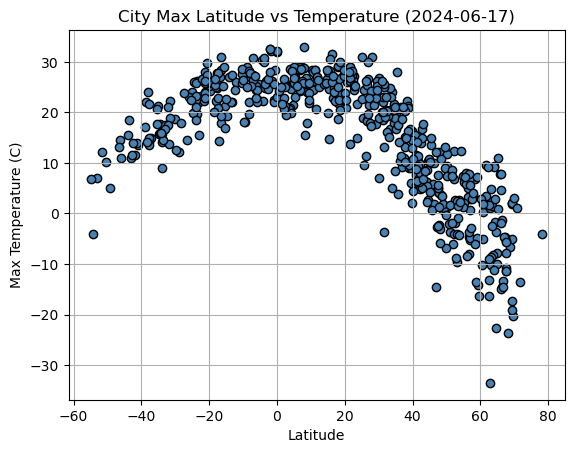

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(latitude, temperature, marker="o", facecolors = "steelblue", edgecolor ="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

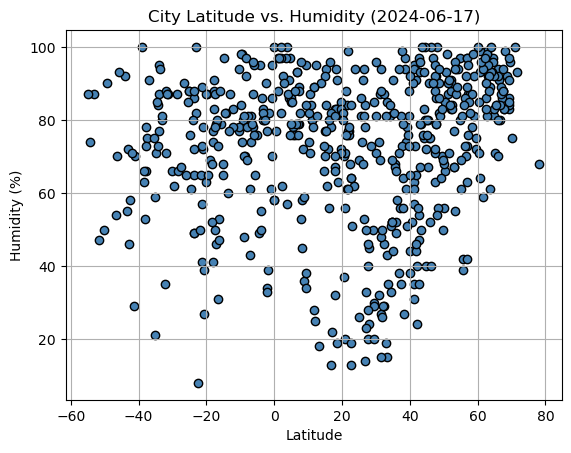

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitude, humidity, marker = "o", facecolor= "steelblue", edgecolor= "black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

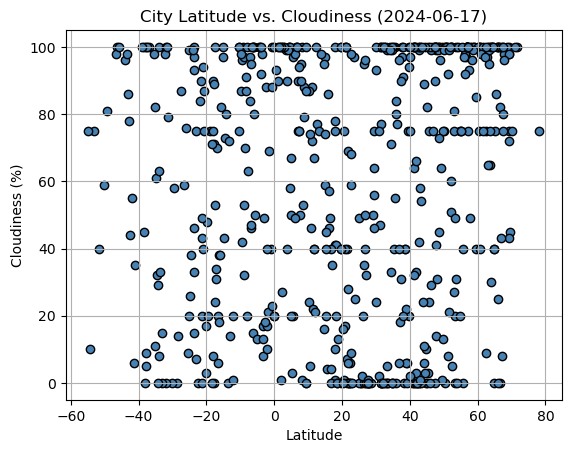

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude, cloudiness, marker= "o", facecolor = "steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

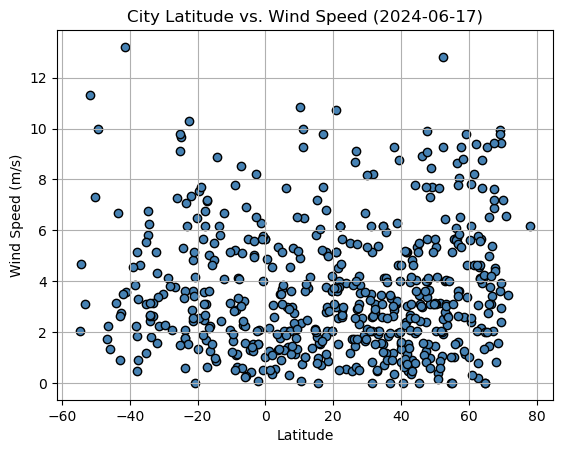

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude, windspeed, marker= "o", facecolor = "steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x, y, x_label="", y_label="", title=""):

    #get linear regression values and store in variables
    slope, intercept, rvalue, pvalue, stderror = linregress(x, y)

    #calculate regression value y = m * x + b
    regress_value = slope * x + intercept

    #plot the line equation 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot the scatter plot 
    plt.scatter(x, y, marker = "o", facecolor = "steelblue", edgecolor="black")
    

    #plot the regression line
    plt.plot(x, regress_value, "r-", label=line_eq)

    #print the r-squared
    print("The r^2-value is: " + str(round(rvalue**2,2)))

    #add labels, title, legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    plt.show()
    

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margate,51.3813,1.3862,8.16,87,92,3.16,GB,2024-11-09 21:45:17
2,zhezqazghan,47.7833,67.7667,-2.34,86,100,9.90,KZ,2024-11-09 21:46:45
5,es castell,39.8795,4.2854,16.38,88,20,1.54,ES,2024-11-09 21:46:48
7,stanley,54.8680,-1.6985,7.38,97,75,0.00,GB,2024-11-09 21:44:16
9,laguna,38.4210,-121.4238,22.28,27,0,3.09,US,2024-11-09 21:46:53


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.07,72,86,0.89,AU,2024-11-09 21:44:09
3,adamstown,-25.0660,-130.1015,23.13,88,99,9.13,PN,2024-11-09 21:46:26
4,port-aux-francais,-49.3500,70.2167,5.04,90,81,9.98,TF,2024-11-09 21:44:55
6,antofagasta,-23.6500,-70.4000,19.60,72,15,1.77,CL,2024-11-09 21:46:03
8,waitangi,-43.9535,-176.5597,15.46,92,96,3.13,NZ,2024-11-09 21:41:36


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.74


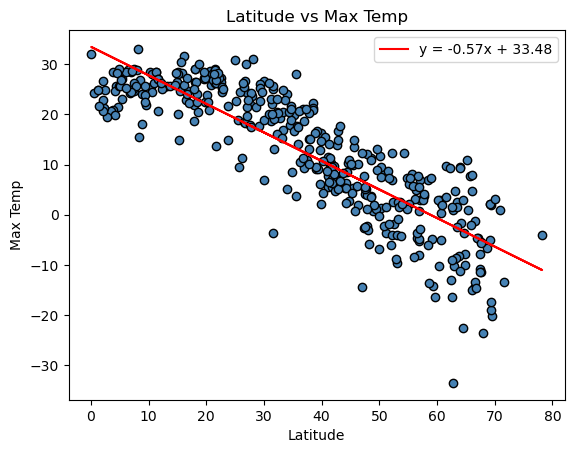

In [61]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                      x_label="Latitude", y_label="Max Temp", title="Latitude vs Max Temp")

The r^2-value is: 0.62


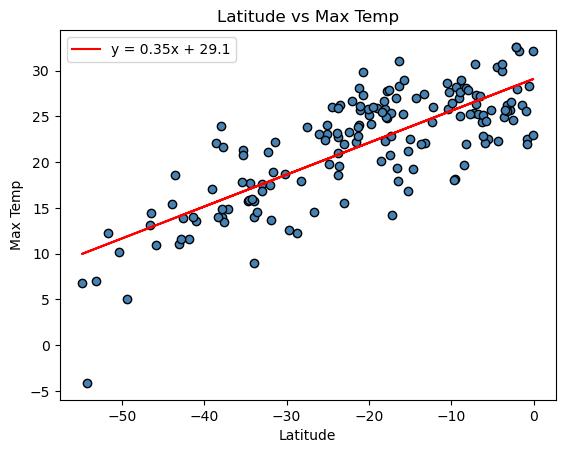

In [59]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                      x_label="Latitude", y_label="Max Temp", title="Latitude vs Max Temp")

**Discussion about the linear relationship:** The linear relationship between latitude and maximum temperature shows a notable pattern that varies between the northern and souther hemispheres, as reflected in the regression equations and R^2 values. 
For the northern hemisphere, we can see that as the latitude increases, the temperature decreases (it has a negativate slope). This is consistent with the expectations that areas further from the equador generally recieve less direct sunlight, resulting in lower temperatures 
For the southern hemisphere, the relationship has a positive slope, meaning maximum temperatures slightly increase as latitude increases, which is the opposite from the northern hemisphere. 
Both studies show a relationship between how the temperature reacts to the changes in latitude, being the northern hemisphere realtionship stronger than the southern hemisphere relationship. It doesn't indicates that the latitude is the only variable, some other environmental factors can alter this pattern, which could be the reason why the southern hemisphere react different in comparison with the northern hemisphere reaction. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05


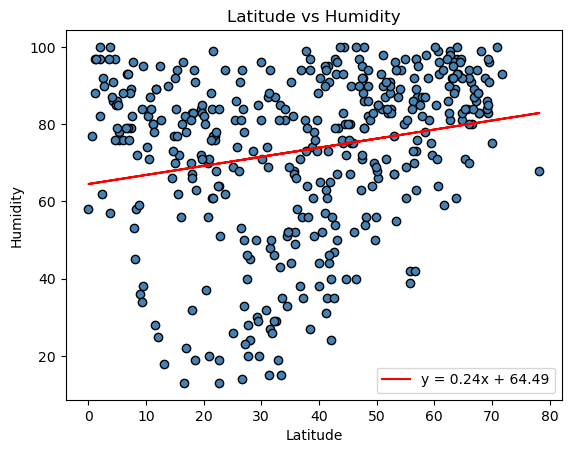

In [63]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                      x_label="Latitude", y_label="Humidity", title="Latitude vs Humidity")

The r^2-value is: 0.01


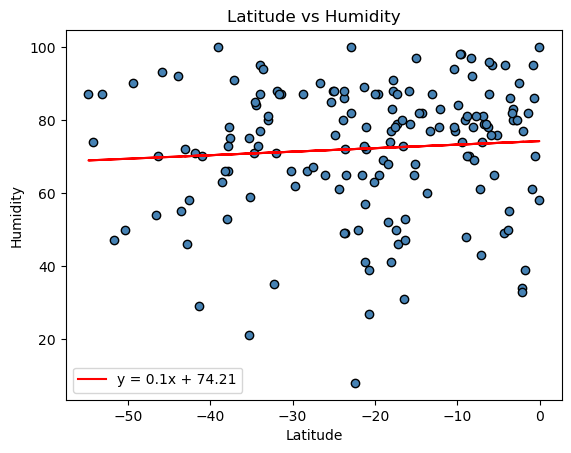

In [64]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                      x_label="Latitude", y_label="Humidity", title="Latitude vs Humidity")

**Discussion about the linear relationship:** The relationship between latitude and Humidity, for both hemispheres, appears to be weak. 
In the northern hemisphere the positive slope suggests a slight increase in humidity as latitude increases, although the effect is minimal. The R^2 value of 0.05 indicates that latitude explains only the 5% of the variation in humidity, meaning the linear relationship is very weak. 
In the southern hemisphere the posoitve slopes alos suggests a very minor increase in humidity with increasing latitude. However this relationship is nearly negligible, as latitude explains only 1% of the variance in humidity.
This results highlight that latitude has little to no linear relationship with humidity in both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04


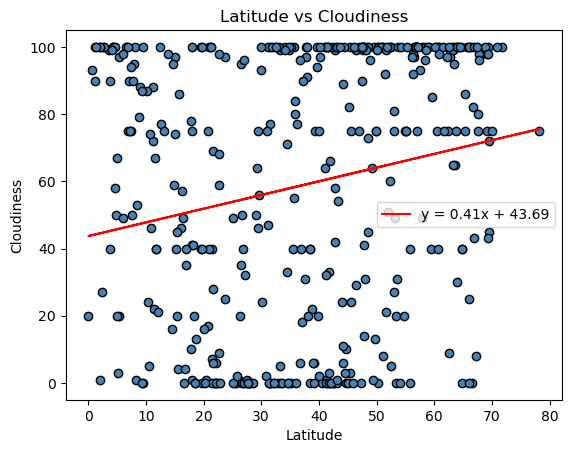

In [65]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                      x_label="Latitude", y_label="Cloudiness", title="Latitude vs Cloudiness")

The r^2-value is: 0.0


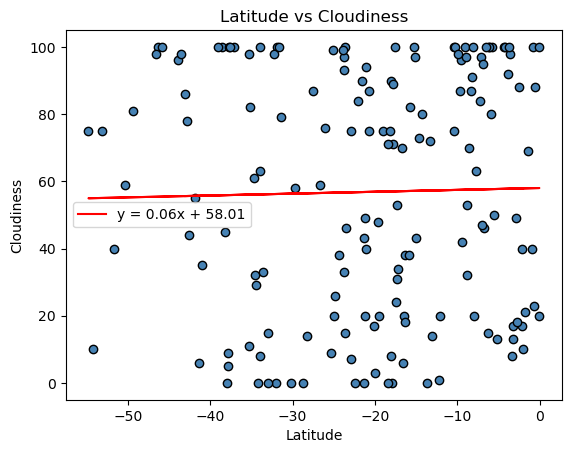

In [66]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                      x_label="Latitude", y_label="Cloudiness", title="Latitude vs Cloudiness")

**Discussion about the linear relationship:** For the northern hemisphere, the positive slope suggests there is a slight increase in cloudiness with increasing humidity. The R^2 value of 0.04 shows us it only represents the 4% of the variance in cloudiness. 
For the southern hemisphere, the is no linear relationship between both variables. The R^2 values of 0.0 explains it and shows that a change in the latitude won't affect the cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03


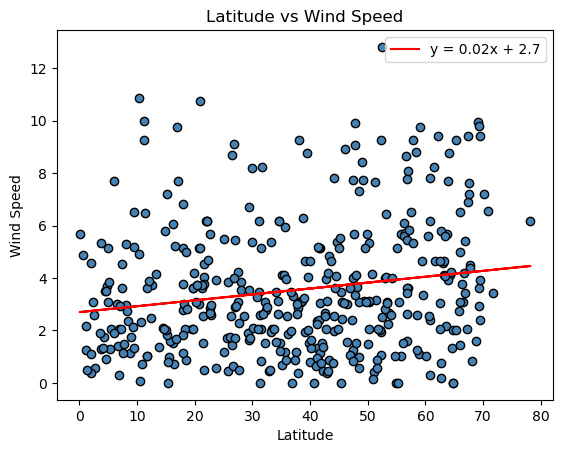

In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                      x_label="Latitude", y_label="Wind Speed", title="Latitude vs Wind Speed")

The r^2-value is: 0.02


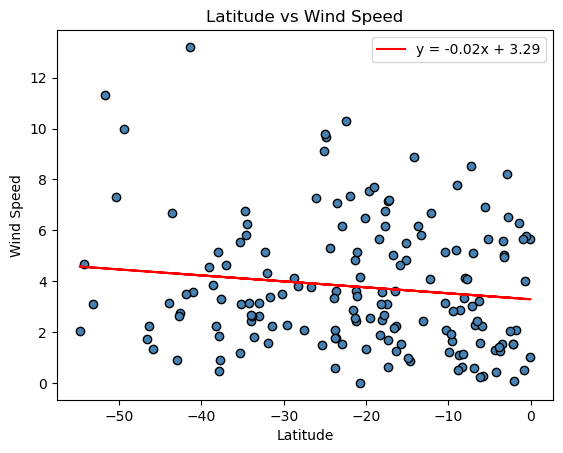

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                      x_label="Latitude", y_label="Wind Speed", title="Latitude vs Wind Speed")

**Discussion about the linear relationship:** Something similar as in the Latitude vs Max Temperature happens here in both hemisphere: the northern hemisphere shows an slightly stronger raltionship than what the southern hemisphere does, but this doesn't means wind speed is affected in its majority by the latitude. 
Both hemispheres R^2 value is nearly to 0 value, which means tha the latitude has implies no variance in the wind speed in any hemisphere. 